In [1]:
#import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import sklearn
import scipy

In [2]:
#import danych
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
attrition = pd.read_csv('attrition.csv')
output = pd.read_csv('sample_output.csv')

# Opis danych
* EmployeeNumber - nr pracownika
* Attrition - informacja, czy dany pracownik odszedł z pracy, czy nie
* Age
* BusinessTravel
* DailyRate - dzienny koszt zatrudnienia pracownika
* Department
* DistanceFromHome
* Education
* EducationField
* EmployeeCount - ilość osób reprezentowanych przez dany wpis
* EnvironmentSatisfaction
* Gender 
* HourlyRate
* JobInvolvment
* JobLevel
* JobRole
* JobSatisfaction
* MaritalStratus
* MonthlyIncome
* MonthlyRate - miesięczny koszt zatrudnienia pracownika
* NumCompaniesWorked
* Over18
* OverTime
* PercentSalaryHike - procentowy wzrost płacy w ciągu ostatnich 2 lat
* PerformanceRating
* RelationshipSatisfaction
* StandardHours
* StockOptionLevel - jaki procent akcji posiada / może posiadać pracownik
* TotalWorkingYears
* TrainingTimesLastYear
* WorkLifeBalance
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* YeralyIncome

In [3]:
#łączenie danych
df = pd.merge(left = df1, right = df2, on = 'EmployeeNumber')

In [4]:
df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [5]:
#sprawdzenie braków danych
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [6]:
#zastąpienie braków dominantą
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].value_counts().index[0])

In [7]:
#LabelEncoding - OPISAĆ
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #sprawdzić kolumny przy deklaracji obiektu

cols_to_encode=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

for i in cols_to_encode:
    df[i]=le.fit_transform(df[i])

## Zmienne kategoryczne po zastosowaniu LabelEncoding:

* BusinessTravel

| Data  | Label |
|-------|-------|
| Test1 | 0     |
| Test2 | 1     |
| Test3 | 2     |

* Department
* EducationField
* Gender
* JobRole
* MaritalStatus
* OverTime

In [8]:
pd.set_option('display.max_columns',None)
df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,2,852.0,1,1.0,1.0,1,1.0,4.0,1,55.0,2.0,2.0,2,4.0,1,5126.0,15998.0,1.0,Y,1,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0
1,1638,38.0,2,397.0,1,2.0,2.0,3,1.0,4.0,0,54.0,2.0,3.0,4,3.0,1,7756.0,14199.0,3.0,Y,1,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
2,164,26.0,2,841.0,1,6.0,3.0,4,1.0,3.0,0,46.0,2.0,1.0,6,2.0,1,2368.0,23300.0,1.0,Y,0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0
3,395,28.0,2,1117.0,1,8.0,2.0,1,1.0,4.0,0,66.0,3.0,1.0,6,4.0,2,3310.0,4488.0,1.0,Y,0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0
4,53,35.0,2,464.0,1,4.0,2.0,4,1.0,3.0,1,75.0,3.0,1.0,2,4.0,0,1951.0,10910.0,1.0,Y,0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,2,621.0,1,15.0,3.0,3,1.0,1.0,0,73.0,3.0,3.0,0,4.0,1,7978.0,14075.0,1.0,Y,0,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,1,95736.0
4445,7976,8823.0,2,621.0,1,15.0,3.0,3,1.0,1.0,0,73.0,3.0,3.0,0,4.0,1,7978.0,14075.0,1.0,Y,0,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,1,95736.0
4446,7977,44.0,0,381.0,1,918785.0,3.0,3,1.0,1.0,1,49.0,1.0,1.0,2,3.0,2,3708.0,2104.0,2.0,Y,0,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,1,44496.0
4447,7978,44.0,0,381.0,1,918785.0,3.0,3,1.0,1.0,1,49.0,1.0,1.0,2,3.0,2,3708.0,2104.0,2.0,Y,0,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,1,44496.0


In [9]:
#usunięcie kolumn
df = df.drop(['Over18','StandardHours'],axis=1)

In [10]:
#statystyki opisowe
df.describe()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,1.604181,801.017982,1.260058,33339.433356,2.909867,2.254664,1.0,2.719263,0.602607,65.977073,2.739492,2.053495,4.474713,2.724882,1.109013,6468.496067,14276.196898,2.681726,0.283884,15.187683,3.148573,2.725556,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,0.532479,77621.952798
std,17226.922333,1566.205147,0.667522,405.605362,0.526311,145352.131423,1.025184,1.333916,0.0,1.093263,0.489414,20.277369,0.712660,1.102979,2.460543,1.107453,0.722538,4682.905422,7149.079135,2.487077,0.450932,3.642842,0.355707,1.080807,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,0.499000,56194.865060
min,1.000000,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,1.000000,458.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2899.000000,7973.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,34788.000000
50%,5902.000000,36.000000,2.000000,804.000000,1.000000,8.000000,3.000000,2.000000,1.0,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4876.000000,14218.000000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000,58512.000000
75%,7014.000000,45.000000,2.000000,1162.000000,2.000000,17.000000,4.000000,3.000000,1.0,4.000000,1.000000,84.000000,3.000000,3.000000,7.000000,4.000000,2.000000,8346.000000,20471.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,1.000000,100152.000000
max,100146.000000,9890.000000,2.000000,1499.000000,2.000000,999590.000000,5.000000,5.000000,1.0,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,1.000000,239988.000000


In [11]:
#kopia ramki
df_md = df[:]

In [12]:
#funkcja do zastąpienia tylko outlierów > Q3 + 1,5 IQR
def detect_q3_outliers(dframe, col):
    q3 = np.percentile(dframe[col], 75)
    q1 = np.percentile(dframe[col], 25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    dframe[col] = np.where(dframe[col] > upper_limit, upper_limit, dframe[col])

In [13]:
#funkcja do zastąpienia wszystkich outlierów
def detect_outliers(dframe, col):
    q3 = np.percentile(dframe[col], 75)
    q1 = np.percentile(dframe[col], 25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit - q1 - 1.5 * iqr
    dframe[col] = np.where(dframe[col] > upper_limit, upper_limit, dframe[col])
    dframe[col] = np.where(dframe[col] < lower_limit, lower_limit, dframe[col])

In [14]:
#funkcja do zastąpienia tylko outlierów > Q3 + 1,5 IQR MEDIANĄ
def detect_q3_outliers_md(dframe, col):
    q3 = np.percentile(dframe[col], 75)
    q1 = np.percentile(dframe[col], 25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    dframe[col]=np.where(dframe[col] > upper_limit, dframe[col].median(), dframe[col])

In [15]:
#funkcja do zastąpienia wszystkich outlierów MEDIANA
def detect_outliers_md(dframe, col):
    q3 = np.percentile(dframe[col], 75)
    q1 = np.percentile(dframe[col], 25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit - q1 - 1.5 * iqr
    dframe[col] = np.where(dframe[col] > upper_limit, dframe[col].median(), dframe[col])
    dframe[col] = np.where(dframe[col] < lower_limit, dframe[col].median(), dframe[col])

In [16]:
#czyszczenie outlierow
cols_to_clean=['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
              'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in cols_to_clean:
    detect_q3_outliers(df,i)
    detect_q3_outliers_md(df_md,i)

In [17]:
#konwersja zmiennych na kategoryczne
cols_to_cat=['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for i in cols_to_cat:
    df[i] = df[i].astype('category')

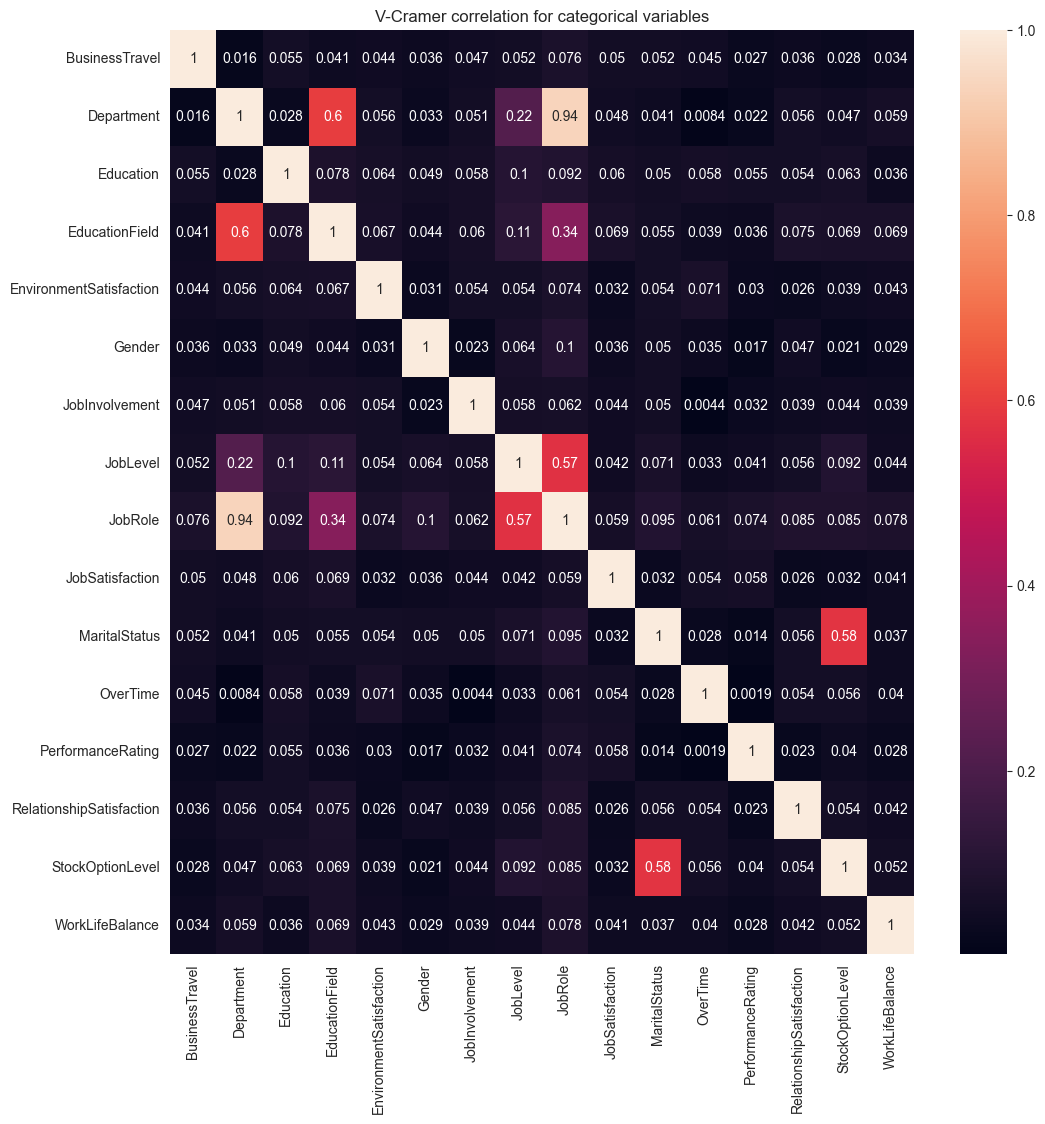

In [18]:
#wizualizacja danych / EDA
#korelacja V-Cramera
import association_metrics as am
cramersv=am.CramersV(df)

plt.figure(figsize=(12,12))
sns.heatmap(cramersv.fit(), annot=True).set(title="V-Cramer correlation for categorical variables")
plt.xticks(rotation=90)
plt.show()

C:\Users\Getry\AppData\Local\Temp\ipykernel_10536\2060636132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['EmployeeCount', 'EmployeeNumber'], axis=1).corr(), annot=True).set(title="Pearson correlation for numeric variables")


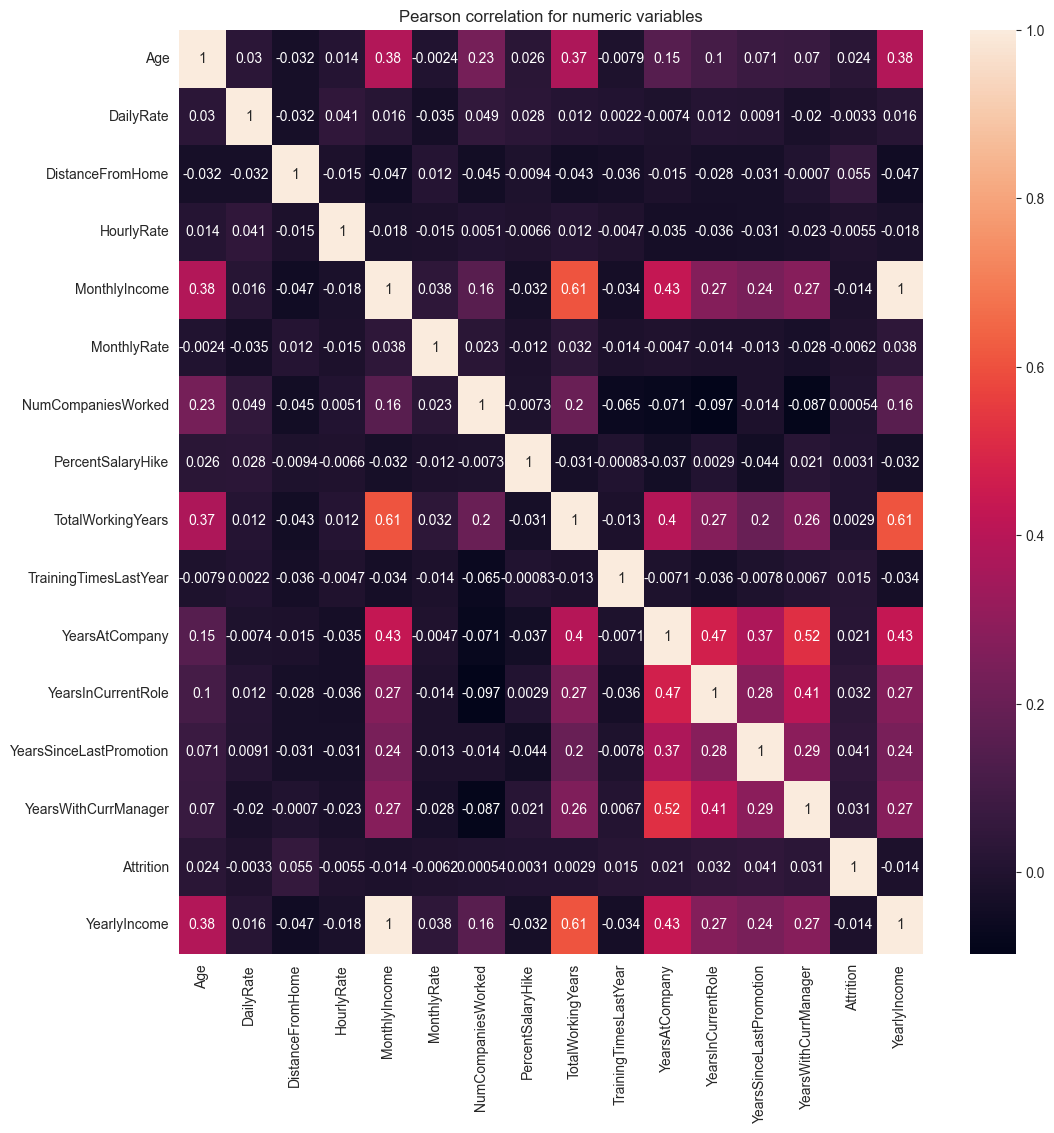

In [19]:
#korelacja Pearsona
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['EmployeeCount', 'EmployeeNumber'], axis=1).corr(), annot=True).set(title="Pearson correlation for numeric variables")
plt.xticks(rotation=90)
plt.show()

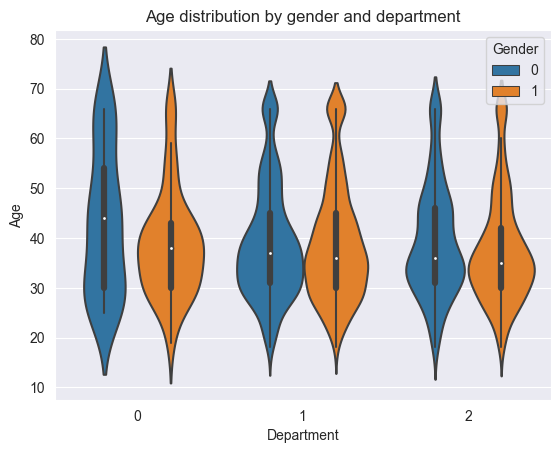

In [20]:
sns.violinplot(data=df, x='Department', y='Age',hue='Gender').set(title='Age distribution by gender and department')
plt.show()

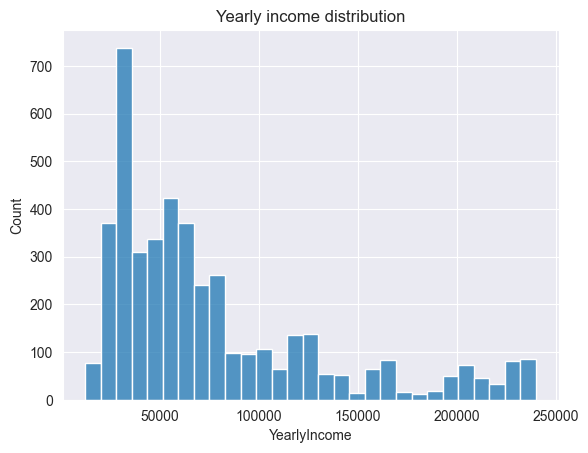

In [21]:
sns.histplot(data = df, x='YearlyIncome').set(title="Yearly income distribution")
plt.show()

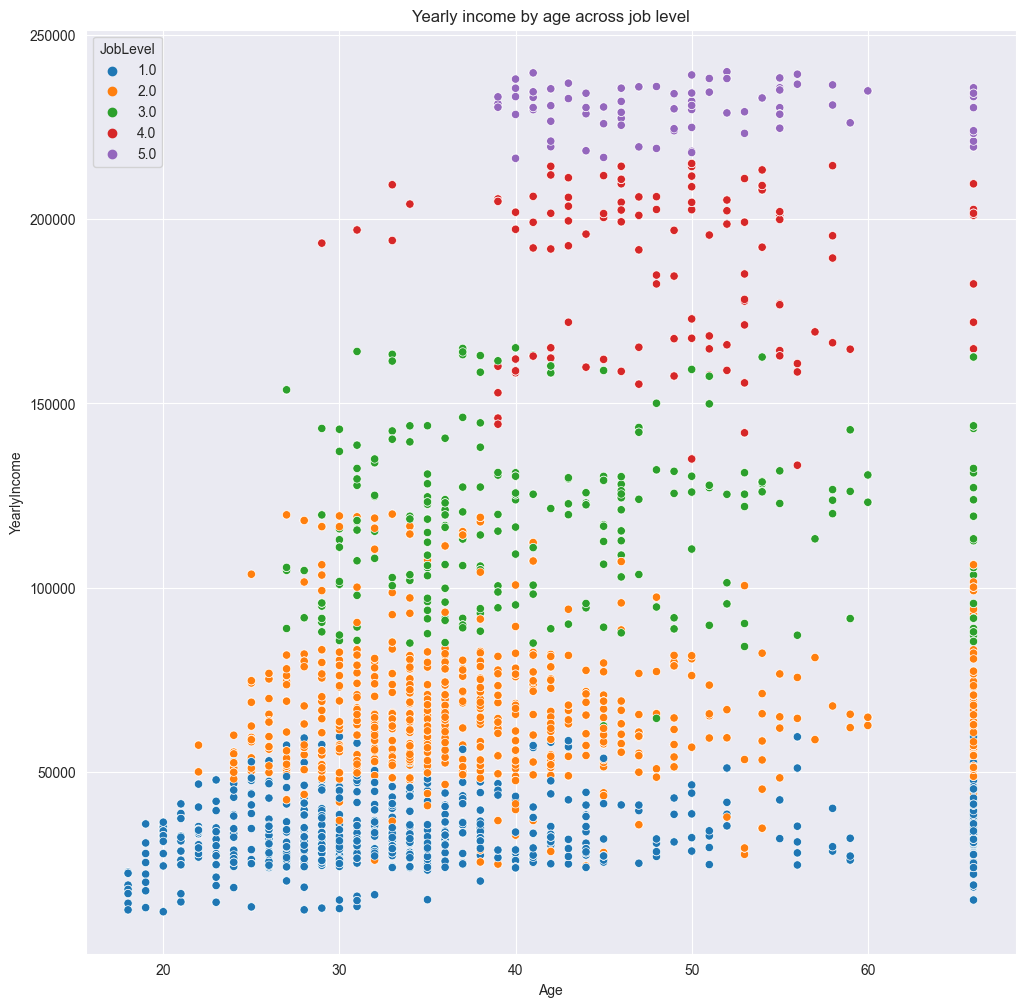

In [22]:
plt.figure(figsize=(12,12))
sns.scatterplot(data = df, x='Age', y='YearlyIncome', hue='JobLevel')
plt.title("Yearly income by age across job level")
plt.show()

In [23]:
df = df.drop(['YearlyIncome', 'JobRole'], axis = 1)

In [24]:
#podział danych na treningowy i testowy
from sklearn.model_selection import train_test_split

y = df['Attrition']
X = df.drop('Attrition',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [25]:
#sprawdzenie kwestii zbalansowania danych
pd.Series(y_train).value_counts(normalize=True)

1    0.532434
0    0.467566
Name: Attrition, dtype: float64

In [26]:
#algorytm 1 - regresja logistyczna
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
lr.predict_proba(X_test)

array([[0.78039867, 0.21960133],
       [0.29456838, 0.70543162],
       [0.39592953, 0.60407047],
       ...,
       [0.21420258, 0.78579742],
       [0.78989529, 0.21010471],
       [0.33925533, 0.66074467]])

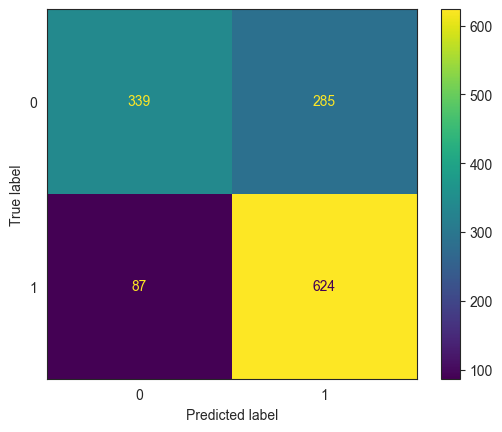

In [28]:
#macierz pomyłek dla lr
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

sns.set_style("white")
cm_display.plot()
plt.show()

In [29]:
#metryki
from sklearn.metrics import precision_score, accuracy_score, f1_score
precision_score(y_test, y_pred, average='weighted')
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average="weighted")

0.7121041555198859

In [30]:
#cross walidacja
summary_table = pd.DataFrame()

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)
    
    lr_mod = LogisticRegression()
    lr_mod.fit(X_train, y_train)
    
    y_pred = lr_mod.predict(X_test)
    
    summary_table = pd.concat([summary_table,
                              pd.DataFrame({"accuracy": [accuracy_score(y_test,y_pred)],
                                           "precision": [precision_score(y_test, y_pred, average='weighted')],
                                           "f1": [f1_score(y_test, y_pred, average='weighted')]})])

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [31]:
summary_table.describe()

,accuracy,precision,f1
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,7.213483e-01,7.375600e-01,7.121042e-01
std,1.115816e-16,2.231632e-16,2.231632e-16
min,7.213483e-01,7.375600e-01,7.121042e-01
25%,7.213483e-01,7.375600e-01,7.121042e-01
50%,7.213483e-01,7.375600e-01,7.121042e-01
75%,7.213483e-01,7.375600e-01,7.121042e-01
max,7.213483e-01,7.375600e-01,7.121042e-01


In [32]:
#cv na podstawie regresji logistycznej
from sklearn.model_selection import cross_val_predict

cv_pred = cross_val_predict(lr, X_train, y_train, cv = 4)

f1_score(y_train, cv_pred, average='weighted')

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.7162199747531398

In [34]:
#standaryzacja danych
from sklearn.preprocessing import StandardScaler

#kolumny do skalowania
X_to_scale = df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany']]

scl = StandardScaler()
X_scaled = pd.DataFrame(scl.fit_transform(X_to_scale), columns = X_to_scale.columns)
X_scaled = pd.concat([X_scaled, df[df.columns[~df.columns.isin(X_to_scale.columns)]]], axis = 1)

In [35]:
#algorytm knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")

X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(X_scaled, y, test_size = 0.3, stratify = y, random_state=42)
knn.fit(X_train_scl, y_train_scl)
y_pred = knn.predict(X_test_scl)
        
acc = accuracy_score(y_test_scl, y_pred)
prec = precision_score(y_test_scl, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")

print(f1)

0.6821427317788668


In [36]:
#drzewo decyzyjne
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.7258426966292135

In [38]:
f1_score(y_test, y_pred)

0.7839433293978749

In [39]:
#random search
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.arange(1,11),
                       "criterion": ["gini", "entropy"],
                       "min_samples_split": np.arange(1,21)}

tree = DecisionTreeClassifier()
clf_tree = RandomizedSearchCV(tree, param_distributions, n_iter = 100)

clf_tree.fit(X_train, y_train)

C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Getry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py",

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [40]:
clf_tree.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_split=20)

In [41]:
y_pred = clf_tree.predict(X_test)

In [42]:
f1_score(y_test, y_pred, average='weighted')

0.7108307237149756

In [43]:
#las losowy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf, average='weighted')
rec = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f1)

0.7135789711021758


In [65]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 50, max_samples = 100, 
                            bootstrap = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=50, n_jobs=-1, random_state=42)

In [66]:
y_pred = bag_clf.predict(X_test)
f1_score(y_test, y_pred)

0.7717791411042945